<a href="https://colab.research.google.com/github/kdhenderson/msds_colab_notebooks/blob/main/ML2_wk9_Swirl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

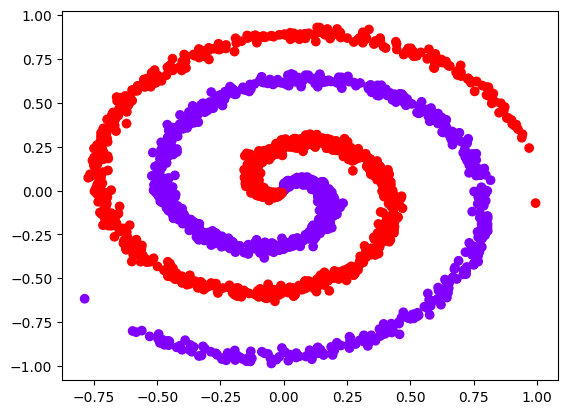

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# seperatation
def generate_spiral_data(n_points, n_classes=2, n_loops=3, offset=5):
    """ Generate n_points per class for n_classes number of spirals with n_loops number of loops """
    X = []
    y = []

    for i in range(n_classes):
        r = np.linspace(0.0, 1, n_points)  # radius
        t = (np.linspace(i * offset * n_loops, (i + 1) *
                        offset * n_loops, n_points)  + np.random.randn(n_points)) * 0.2 # theta
        X.append(np.c_[r * np.sin(t), r * np.cos(t)])
        y.append(np.ones(n_points) * i)

    X = np.concatenate(X)
    y = np.concatenate(y)
    return  np.c_[X,y]

# generate 2 spirals each with 1000 data points and 3 loops
data = generate_spiral_data(1000,  n_classes=2, n_loops=5, offset=10)# 5,10. 3,6. 3,3
np.random.shuffle(data)

M = data[:,:2]
L = data[:,2]

# visualize data
plt.scatter(M[:, 0], M[:, 1], c=L, cmap='rainbow')
plt.show()

You can change the width(100 number), the number of layers, the learning rate, and the data set to make it simpler.  The goal is ~100% accuracy.

In [ ]:
import tensorflow as tf
from collections import Counter

train = int(M.shape[0]*.80)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='sigmoid', input_shape=(M.shape[1],)),
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.001),
                                                loss='binary_crossentropy',
                                                metrics=['accuracy']) # don't chagne SGD, or loss
model.fit(M[:train], L[:train], epochs=40, verbose=1)
pred = model.predict(M[train:])

print(Counter(zip(np.round(pred).T[0], L[train:])))

Epoch 1/40
 1/50 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.6250 - loss: 0.6837

KeyboardInterrupt: 

In [ ]:
# prompt: Can you use the folowing code but transform it into pytroch rather then tensorflow:
# import tensorflow as tf
# from collections import Counter
# train = int(M.shape[0]*.80)
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(100, activation='sigmoid', input_shape=(M.shape[1],)),
#     tf.keras.layers.Dense(100, activation='sigmoid'),
#     tf.keras.layers.Dense(100, activation='sigmoid'),
#     tf.keras.layers.Dense(1, activation='sigmoid')])
# model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.001),
#                                                 loss='binary_crossentropy',
#                                                 metrics=['accuracy']) # don't chagne SGD, or loss
# model.fit(M[:train], L[:train], epochs=10, verbose=1)
# pred = model.predict(M[train:])
# print(Counter(zip(np.round(pred).T[0], L[train:])))

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from collections import Counter

# ... (generate_spiral_data function remains the same)

# generate 2 spirals each with 1000 data points and 3 loops
data = generate_spiral_data(1000,  n_classes=2, n_loops=5, offset=10)
np.random.shuffle(data)

M = data[:,:2]
L = data[:,2]

# Convert data to PyTorch tensors
M = torch.tensor(M, dtype=torch.float32)
L = torch.tensor(L, dtype=torch.float32).unsqueeze(1) # Add a dimension for the target

# visualize data
plt.scatter(M[:, 0], M[:, 1], c=L, cmap='rainbow')
plt.show()

train = int(M.shape[0]*.80)

# Define the model
class SpiralClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SpiralClassifier, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 100),
            nn.Sigmoid(),
            nn.Linear(100, 100),
            nn.Sigmoid(),
            nn.Linear(100, 100),
            nn.Sigmoid(),
            nn.Linear(100, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

model = SpiralClassifier(M.shape[1])

# Define optimizer and loss function
optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.BCELoss()


# Training loop
for epoch in range(10):
  # Forward pass
  outputs = model(M[:train])
  loss = criterion(outputs, L[:train])

  # Backward and optimize
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print(f'Epoch [{epoch+1}/10], Loss: {loss.item():.4f}')

# Predictions
with torch.no_grad():
  pred = model(M[train:])

# Convert predictions and targets back to NumPy for Counter
pred_np = np.round(pred.numpy()).flatten()
L_train_np = L[train:].numpy().flatten()
print(Counter(zip(pred_np, L_train_np)))


https://developers.google.com/machine-learning/crash-course/DPE/tp-ss-neural-net-intro-spiral